importing libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Upload the dataset
df =pd.read_csv("/content/drive/MyDrive/Mymainproject/weatherAUS.csv")

In [ ]:
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK

In [ ]:
# Drop columns with too many missing values and unnecessary features
df_cleaned = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date'])
print(df_cleaned.head())

  Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       1007.7    

In [ ]:
df.shape

(142193, 24)

Missing values per column:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


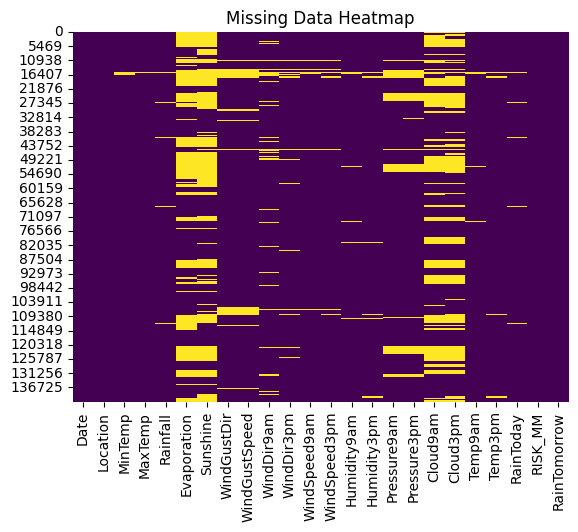

In [ ]:
# Step 2: Check for Missing Data
# Display missing values per column
# Visualize missing data with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing values per column:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
# Create a table showing missing values, percentages, and data types
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum() / df.shape[0] * 100
value = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing,
    'data type': df.dtypes
}
frame = pd.DataFrame(value)
print(frame)

               missing_values  percent_missing % data type
Date                        0           0.000000    object
Location                    0           0.000000    object
MinTemp                   637           0.447983   float64
MaxTemp                   322           0.226453   float64
Rainfall                 1406           0.988797   float64
Evaporation             60843          42.789026   float64
Sunshine                67816          47.692924   float64
WindGustDir              9330           6.561504    object
WindGustSpeed            9270           6.519308   float64
WindDir9am              10013           7.041838    object
WindDir3pm               3778           2.656952    object
WindSpeed9am             1348           0.948007   float64
WindSpeed3pm             2630           1.849599   float64
Humidity9am              1774           1.247600   float64
Humidity3pm              3610           2.538803   float64
Pressure9am             14014           9.855619   float

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RISK_MM        142193 non-nul

In [ ]:
# # Encode categorical variables

categorical_cols = df_cleaned.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# If RainTomorrow is still in Yes/No format, then encode it
if df_cleaned['RainTomorrow'].dtype == 'object':
    df_cleaned['RainTomorrow'] = df_cleaned['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Check the distribution of RainTomorrow after encoding
print("Distribution of RainTomorrow after encoding:")
print(df_cleaned['RainTomorrow'].value_counts())




Distribution of RainTomorrow after encoding:
RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


In [ ]:
# Handle missing values for numerical columns
numerical_cols = df_cleaned.select_dtypes(include='float64').columns
imputer = SimpleImputer(strategy='mean')
df_cleaned[numerical_cols] = imputer.fit_transform(df_cleaned[numerical_cols])

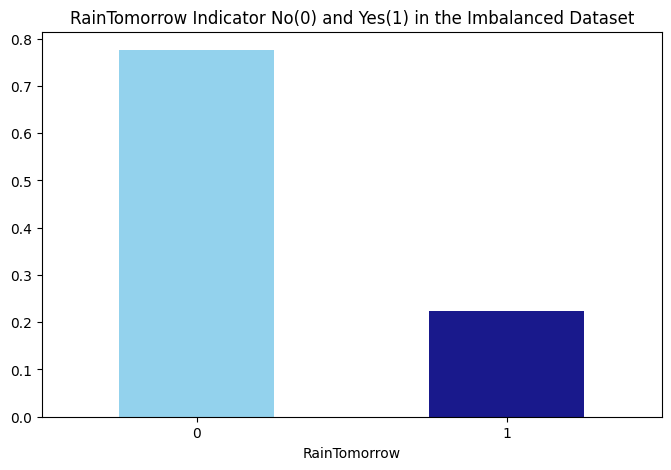

In [ ]:
# Visualize Class Imbalance before Balancing
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
df_cleaned.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()


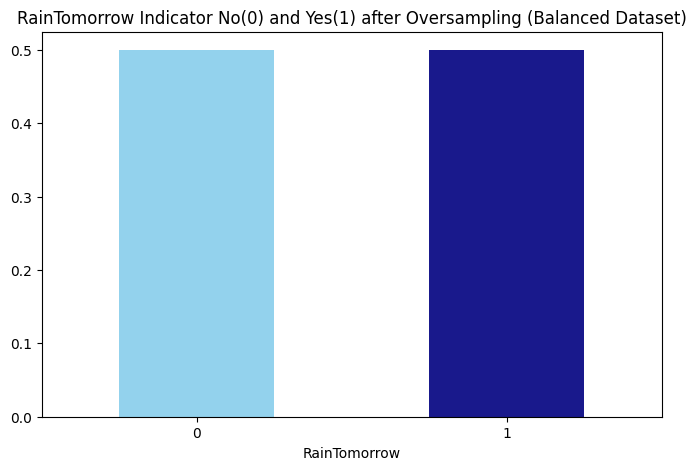

In [ ]:
from sklearn.utils import resample

# Split the dataset into two groups
no = df_cleaned[df_cleaned['RainTomorrow'] == 0]
yes = df_cleaned[df_cleaned['RainTomorrow'] == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

    # Plot the balanced dataset
fig = plt.figure(figsize=(8, 5))
oversampled['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add noise to reduce overfitting
X_train_scaled += np.random.normal(0, 0.01, X_train_scaled.shape)
X_test_scaled += np.random.normal(0, 0.01, X_test_scaled.shape)



In [ ]:
# Display the shape of training and testing sets
print("\nTraining and Testing Data Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Training and Testing Data Shapes:
X_train: (85315, 18), X_test: (56878, 18)
y_train: (85315,), y_test: (56878,)


In [ ]:
print(df_cleaned['RainTomorrow'].value_counts())


RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=20,          # Fewer trees → less stable, more variance
    max_depth=4,              # Shallow trees → less overfitting
    min_samples_split=20,     # Require more samples to split → simpler tree
    min_samples_leaf=10,      # Bigger leaves → fewer splits
    max_features='sqrt',      # Limit features considered for split
    class_weight='balanced',  # Maintain fairness
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))



Confusion Matrix:
 [[43870   257]
 [   48 12703]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     44127
           1       0.98      1.00      0.99     12751

    accuracy                           0.99     56878
   macro avg       0.99      1.00      0.99     56878
weighted avg       0.99      0.99      0.99     56878


Accuracy Score: 0.9946376454868314

ROC-AUC Score: 0.9980168391162234


# from sklearn.svm import SVC

# # Step 1: Initialize the SVM model
# svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# # Step 2: Train the model
# svm_model.fit(X_train_scaled, y_train)

# # Step 3: Make predictions
# y_pred_svm = svm_model.predict(X_test_scaled)

# # Step 4: Evaluate the model
# print("\nSVM Model Evaluation:")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
# print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))
# print("\nROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))


# =====================

# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# # Step 1: Initialize the SVM model with regularization
# svm_model = SVC(
#     kernel='rbf',          # Radial basis function kernel (non-linear)
#     C=1.0,                 # Regularization parameter (try reducing to 0.5 or 0.1 to reduce overfitting)
#     gamma='scale',         # Controls how far influence of a single training example reaches
#     probability=True,      # Needed for ROC-AUC
#     class_weight='balanced',  # Important for handling class imbalance
#     random_state=42
# )

# # Step 2: Train the model
# svm_model.fit(X_train_scaled, y_train)

# # Step 3: Make predictions
# y_pred_svm = svm_model.predict(X_test_scaled)

# # Step 4: Evaluate the model
# print("\nSVM Model Evaluation:")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
# print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))
# print("\nROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))

# ================


from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Step 1: Use lower C (more regularization) and a larger gamma
svm_model = SVC(
    kernel='rbf',
    C=0.3,                     # Lower regularization strength (less sensitive to data)
    gamma=0.3,                 # Slightly higher gamma → lower flexibility
    probability=True,
    class_weight='balanced',
    random_state=42
)

# Step 2: Train the model
svm_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 4: Evaluate the model
print("\nSVM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import numpy as np

# Reshape input
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    Input(shape=(1, X_train_scaled.shape[1])),
    LSTM(16, return_sequences=True),      # fewer units
    Dropout(0.5),                          # heavier dropout
    LSTM(8),                               # fewer units
    Dropout(0.5),                          # more dropout
    Dense(4, activation='relu'),          # tiny dense layer
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train fewer epochs
history = model.fit(X_train_lstm, y_train, epochs=1, batch_size=128, validation_data=(X_test_lstm, y_test), shuffle=True)

# Predict and Evaluate
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("\nLSTM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_lstm))
print("\nROC-AUC Score:", roc_auc_score(y_test, model.predict(X_test_lstm)))

# Save the model
model.save('lstm_model_weakened.keras')
print("Weaker LSTM model saved successfully.")



667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7857 - loss: 0.5478 - val_accuracy: 0.9444 - val_loss: 0.1608
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

LSTM Model Evaluation:
Confusion Matrix:
 [[43826   301]
 [ 2859  9892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     44127
           1       0.97      0.78      0.86     12751

    accuracy                           0.94     56878
   macro avg       0.95      0.88      0.91     56878
weighted avg       0.95      0.94      0.94     56878


Accuracy Score: 0.9444424909455326
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

ROC-AUC Score: 0.970481998333437
Weaker LSTM model saved successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.decision_function(X_test_scaled)  # Use decision_function for SVM
evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")

# Evaluate LSTM
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
y_prob_lstm = model.predict(X_test_lstm).flatten()
evaluate_model(y_test, y_pred_lstm, y_prob_lstm, "LSTM")



Random Forest Model Evaluation:
Accuracy: 0.9954463940363585
Precision: 0.9850132008075788
Recall: 0.9948239353776175
F1-Score: 0.9898942604081314
ROC-AUC Score: 0.9985678826222948

Confusion Matrix:
 [[43934   193]
 [   66 12685]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44127
           1       0.99      0.99      0.99     12751

    accuracy                           1.00     56878
   macro avg       0.99      1.00      0.99     56878
weighted avg       1.00      1.00      1.00     56878


SVM Model Evaluation:
Accuracy: 0.9847216850100214
Precision: 0.9435568164849932
Recall: 0.9911379499647086
F1-Score: 0.966762287244215
ROC-AUC Score: 0.9993934277332572

Confusion Matrix:
 [[43371   756]
 [  113 12638]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     44127
           1       0.94      0.99      0.97     12751

    

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_test_scaled, y_test, cv=5)
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Random Forest Mean CV Accuracy:", cv_scores_rf.mean())

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X_test_scaled, y_test, cv=5)
print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean CV Accuracy:", cv_scores_svm.mean())


Random Forest Cross-Validation Scores: [0.99498945 0.99463783 0.99560478 0.99578022 0.99463736]
Random Forest Mean CV Accuracy: 0.9951299299856261

SVM Cross-Validation Scores: [0.98514416 0.98417722 0.98514416 0.98461538 0.98215385]
SVM Mean CV Accuracy: 0.9842469544520178


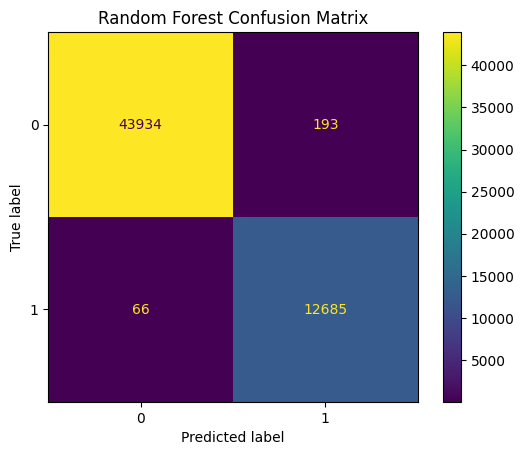

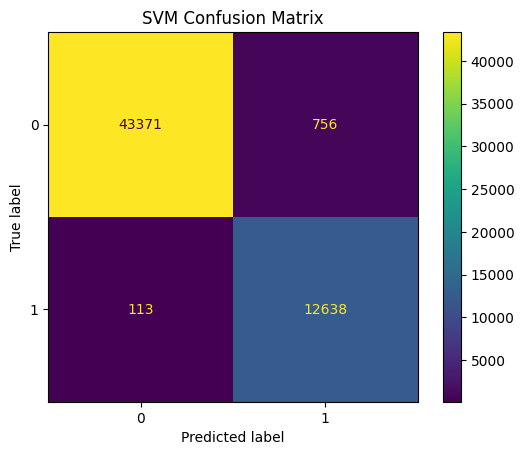

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


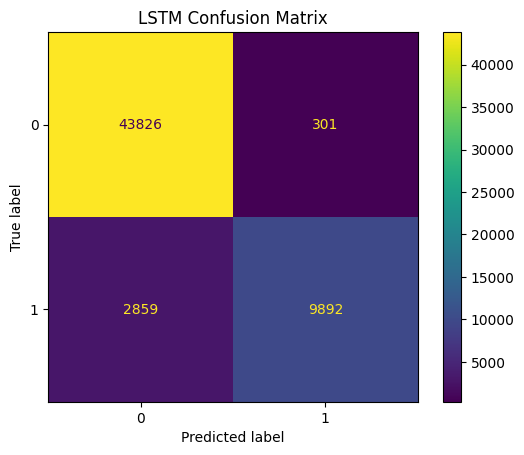

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion Matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

# Confusion Matrix for LSTM
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lstm)
plt.title("LSTM Confusion Matrix")
plt.show()


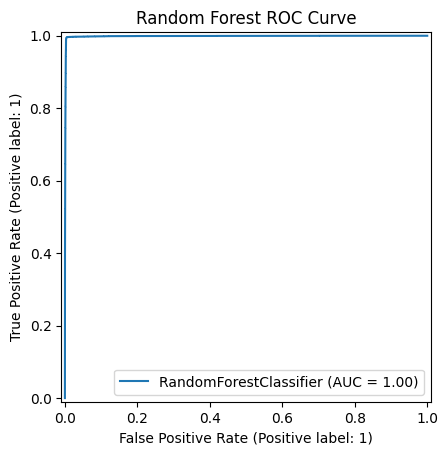

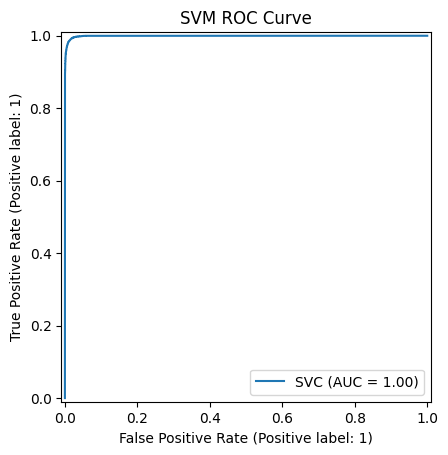

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


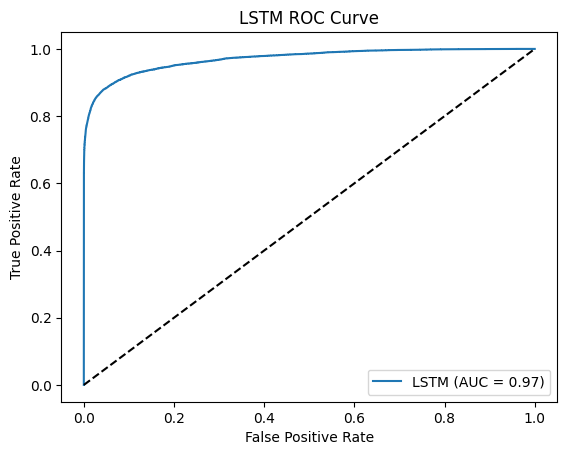

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

# ROC Curve for SVM
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("SVM ROC Curve")
plt.show()


# ROC Curve and AUC for LSTM
y_prob_lstm = model.predict(X_test_lstm).flatten()
fpr, tpr, _ = roc_curve(y_test, y_prob_lstm)
auc_lstm = roc_auc_score(y_test, y_prob_lstm)  # Calculate AUC

plt.plot(fpr, tpr, label=f"LSTM (AUC = {auc_lstm:.2f})")  # Display AUC in legend
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Function to predict category based on probability
def predict_rainfall_scale(prob):
    if prob < 0.25:
        return "Low (Green)"
    elif prob < 0.50:
        return "Moderate (Yellow)"
    elif prob < 0.75:
        return "High (Orange)"
    else:
        return "Very High (Red)"

# Define category-to-amount mapping
rainfall_scale_mapping = {
    'Low (Green)': '0-10 mm',
    'Moderate (Yellow)': '11-50 mm',
    'High (Orange)': '51-100 mm',
    'Very High (Red)': '>100 mm'
}

# Combine function to get both scale and amount
def get_rainfall_scale_and_amount(prob):
    scale = predict_rainfall_scale(prob)
    amount = rainfall_scale_mapping[scale]
    return scale, amount

# Predict and Categorize using Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
metrics_rf = []

# Organize predictions into a list of dictionaries for DataFrame
for i, prob in enumerate(y_prob_rf[:10]):
    scale, amount = get_rainfall_scale_and_amount(prob)
    metrics_rf.append({
        # 'Prediction #': i + 1,
        # 'Probability': round(prob, 2),
        'Risk Level': scale,
        'Rainfall Amount': amount
    })

# Convert to DataFrame for a metrics table view
df_rf = pd.DataFrame(metrics_rf)
print("\nRandom Forest - Rainfall Prediction Metrics:")
print(df_rf)



Random Forest - Rainfall Prediction Metrics:
        Risk Level Rainfall Amount
0      Low (Green)         0-10 mm
1  Very High (Red)         >100 mm
2      Low (Green)         0-10 mm
3      Low (Green)         0-10 mm
4      Low (Green)         0-10 mm
5      Low (Green)         0-10 mm
6      Low (Green)         0-10 mm
7      Low (Green)         0-10 mm
8      Low (Green)         0-10 mm
9  Very High (Red)         >100 mm


In [ ]:
def get_alert(prediction_prob):
    if prediction_prob < 0.2:
        return "Green"
    elif prediction_prob < 0.5:
        return "Yellow"
    elif prediction_prob < 0.8:
        return "Orange"
    else:
        return "Red"


In [ ]:
import joblib
from tensorflow import keras

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save SVM Model
joblib.dump(svm_model, 'svm_model.pkl')

# Save LSTM Model without optimizer state
model.save('lstm_model.keras')

# Load LSTM Model for prediction (without optimizer state)
model = keras.models.load_model('lstm_model.keras', compile=False)

# # Continue with predictions
# sample_prediction_lstm = model.predict(sample_data_scaled)
# print("Predicted (LSTM):", sample_prediction_lstm)


In [ ]:
import pandas as pd
from keras.models import load_model

# Load LSTM model
lstm_model = load_model('/content/lstm_model.h5')

# Select sample data
sample_data = pd.DataFrame([X_test.iloc[0]])
print("Sample Data:", sample_data)

# Scale the data
sample_data_scaled = scaler.transform(sample_data)

# Predict using the Random Forest model
sample_prediction = rf_model.predict(sample_data_scaled)
print("Predicted (Random Forest):", sample_prediction)

# Predict using the SVM model
sample_prediction_svm = svm_model.predict(sample_data_scaled)
print("Predicted (SVM):", sample_prediction_svm)

# ✅ Fix for LSTM Prediction
# LSTM needs input with shape (samples, time_steps, features) -> (1, 1, 18)
sample_data_reshaped = sample_data_scaled.reshape(1, 1, sample_data_scaled.shape[1])

# Predict using LSTM
sample_prediction_lstm = lstm_model.predict(sample_data_reshaped)
print("Predicted (LSTM):", (sample_prediction_lstm > 0.5).astype(int))  # Convert to 0 or 1 if needed


Sample Data:        Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
13748      21.0      4.8     16.0       0.0         12.0           35.0   

       WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
13748        11.0        12.0          13.0          24.0         86.0   

       Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
13748         51.0       1024.8       1023.4     10.4     15.5        0.0   

       RISK_MM  
13748      0.0  
Predicted (Random Forest): [0]
Predicted (SVM): [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Predicted (LSTM): [[0]]


In [ ]:
!ls /content/


drive	       lstm_model.keras		  random_forest_model.pkl  svm_model.pkl
lstm_model.h5  lstm_model_weakened.keras  sample_data
